1. CNN-Based Image Classification Dataset.

Use the Fashion-MNIST dataset available in Keras.
(Classes 0–4 → Benign activity, Classes 5–9 → Suspicious activity)

Tasks

a) Dataset Loading & Preprocessing
Load the Fashion-MNIST dataset
Normalize pixel values
Reshape images for CNN input
Convert multi-class labels into binary classes

b) CNN Architecture Design (Clearly mention the role of each layer)
Design a CNN with:
One convolutional layer with ReLU activation
One max-pooling layer
One flatten layer
One dense hidden layer
One output layer with _?_activation

c) Model Compilation & Training
Compile the model using Adam optimizer
Use binary cross-entropy loss
Train the model for a minimum of 5 epochs

d) Visualization
Plot training vs validation accuracy
Plot training vs validation loss

e) Performance Evaluation
Evaluate model accuracy on test data
Display confusion matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize (0-255) → (0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert 10 classes → Binary
# 0-4 (Benign) → 0
# 5-9 (Suspicious) → 1
y_train_binary = np.where(y_train < 5, 0, 1)
y_test_binary = np.where(y_test < 5, 0, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # Convolution Layer (feature extraction)
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    # Max Pooling (dimension reduction)
    MaxPooling2D(pool_size=(2,2)),

    # Flatten Layer (convert 2D → 1D)
    Flatten(),

    # Dense Hidden Layer (learning patterns)
    Dense(64, activation='relu'),

    # Output Layer (binary classification)
    Dense(1, activation='sigmoid')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,561 (1.32 MB)

 Trainable params: 346,561 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train_binary,
    validation_data=(X_test, y_test_binary),
    epochs=5,
    batch_size=128
)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.9037 - loss: 0.2316 - val_accuracy: 0.9300 - val_loss: 0.1717
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9370 - loss: 0.1543 - val_accuracy: 0.9390 - val_loss: 0.1497
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9417 - loss: 0.1382 - val_accuracy: 0.9435 - val_loss: 0.1406
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9510 - loss: 0.1210 - val_accuracy: 0.9459 - val_loss: 0.1320
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9546 - loss: 0.1078 - val_accuracy: 0.9483 - val_loss: 0.1261


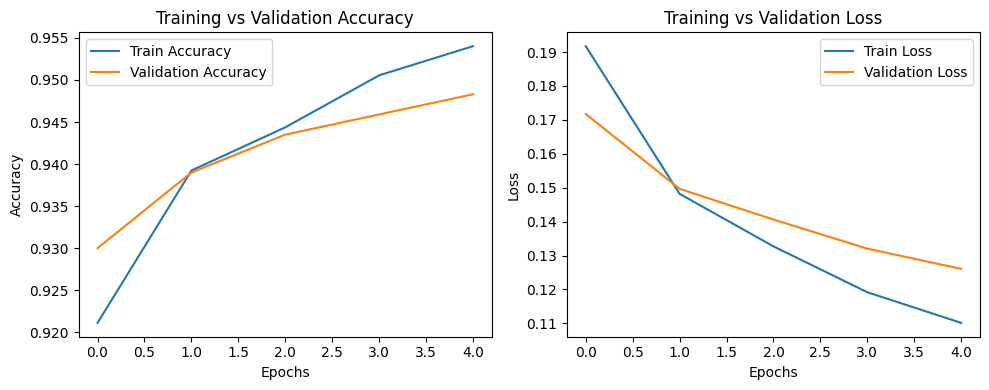

In [ ]:
plt.figure(figsize=(10,4))

# Accuracy Graph
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Graph
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Evaluate model on test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test_binary, verbose=0)

print("Test Loss :", test_loss)
print("Test Accuracy :", test_accuracy)


Test Loss : 0.12608252465724945
Test Accuracy : 0.9483000040054321


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Confusion Matrix:
[[4865  135]
 [ 382 4618]]


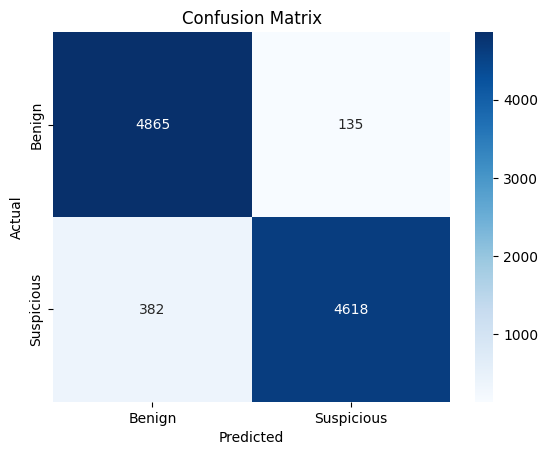


Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.97      0.95      5000
  Suspicious       0.97      0.92      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probability → binary class
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred)

print("Confusion Matrix:")
print(cm)

# Optional: better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign","Suspicious"],
            yticklabels=["Benign","Suspicious"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Detailed performance
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred,
                            target_names=["Benign","Suspicious"]))


True Positive (TP) → Suspicious detected correctly

True Negative (TN) → Benign correctly classified

False Positive (FP) → Benign flagged as suspicious (annoying alerts)

False Negative (FN) → Suspicious missed (dangerous)

Your goal in security models:

Minimize FN (missed threats)

Keep FP reasonably low to avoid alert fatigue